In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percenatge: float
    summary: str


In [21]:
def calculate_strike_rate(state: BatsmanState) -> BatsmanState:

    strike_rate = (state['runs']/state['balls'])*100
    
    return {'strike_rate': strike_rate}


In [22]:
def calculate_balls_per_boundary(state: BatsmanState) -> BatsmanState:
    
    balls_per_boundary = state['balls']/(state['fours']+state['sixes'])

    return {'balls_per_boundary': balls_per_boundary}

In [23]:
def calculate_boundary_percenatge(state: BatsmanState) -> BatsmanState:

    boundary_percentage = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100

    return {'boundary_percenatge': boundary_percentage}


In [24]:
def summary(state: BatsmanState) -> BatsmanState:
    
    summary = f"""
    Strike Rate: {state['strike_rate']}
    Balls per Boundary: {state['balls_per_boundary']}
    Boundary Percenatage: {state['boundary_percenatge']}
    """
    
    return {'summary': summary}

In [25]:
graph = StateGraph(BatsmanState)

# nodes
graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percenatge', calculate_boundary_percenatge)
graph.add_node('summary', summary)

# edges 
graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percenatge')

graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calculate_boundary_percenatge', 'summary')

graph.add_edge('summary', END)

# compile
workflow = graph.compile()


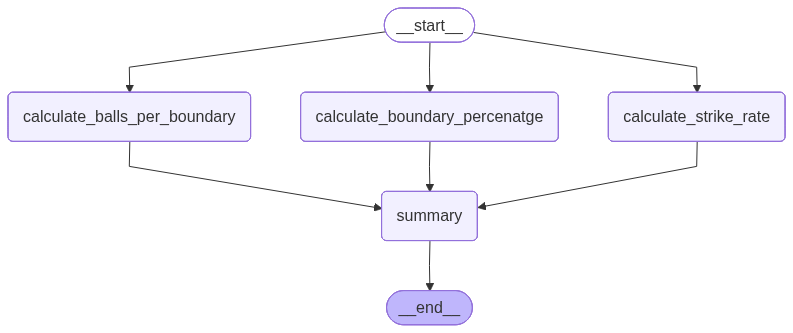

In [26]:
workflow

In [27]:
# execute the graph

initial_state = {
    'runs': 100,
    'balls': 60,
    'fours': 4,
    'sixes': 6
}

final_state = workflow.invoke(initial_state)

In [28]:
final_state

{'runs': 100,
 'balls': 60,
 'fours': 4,
 'sixes': 6,
 'strike_rate': 166.66666666666669,
 'balls_per_boundary': 6.0,
 'boundary_percenatge': 52.0,
 'summary': '\n    Strike Rate: 166.66666666666669\n    Balls per Boundary: 6.0\n    Boundary Percenatage: 52.0\n    '}